# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     779.2
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           2.01e-39
Time:                        17:29:53   Log-Likelihood:                -3.8781
No. Observations:                  50   AIC:                             15.76
Df Residuals:                      46   BIC:                             23.40
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0087      0.093     53.904      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.52256495  5.00209314  5.4423316   5.81586065  6.10515619  6.30546895
  6.4256047   6.48647754  6.51767376  6.55259089  6.62295057  6.7535868
  6.95836577  7.23790767  7.57948484  7.95911282  8.345491    8.70514517
  9.00792727  9.2319686   9.36727282  9.41735829  9.39868004  9.33792623
  9.26763339  9.22084072  9.22566188  9.30066598  9.45182673  9.67154097
  9.93987786 10.22785345 10.50219267 10.7307963  10.88801485 10.95886261
 10.94147984 10.84743825 10.69983986 10.52952137 10.36998778 10.25190763
 10.19807423 10.21966078 10.31438467 10.46688247 10.65123413 10.83522156
 10.98562196 11.07366625]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.06884115 10.93150167 10.68137833 10.36343454 10.03685797  9.76056932
  9.57879651  9.51024613  9.54352341  9.63992207]


## Plot comparison

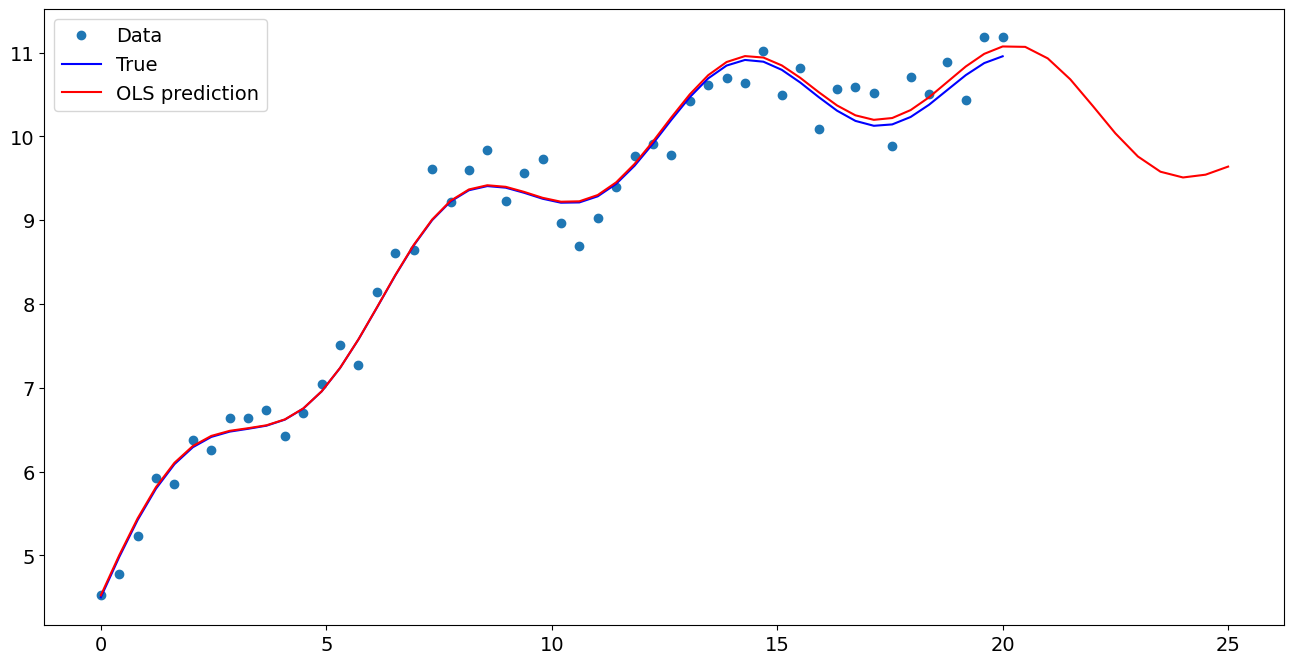

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.008720
x1                  0.499051
np.sin(x1)          0.503122
I((x1 - 5) ** 2)   -0.019446
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.068841
1    10.931502
2    10.681378
3    10.363435
4    10.036858
5     9.760569
6     9.578797
7     9.510246
8     9.543523
9     9.639922
dtype: float64